### Hardener - P4A

Loading data	86.68 s
Preparing input	51.97 s
Fitting	353.58 s
pair_coeff	1 1 0   0   3.277512361756635  0   -2569.1362956620287  0   347174.14250165224  0   -8999961.745134354  0   0   0   0   0   0   

Fitting gamma	360.27 s
gamma = 6.664940318604565


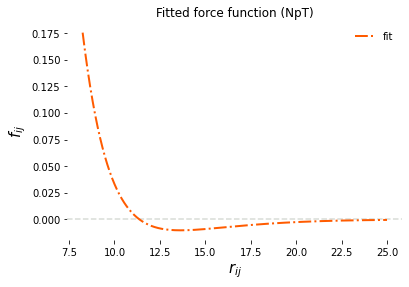

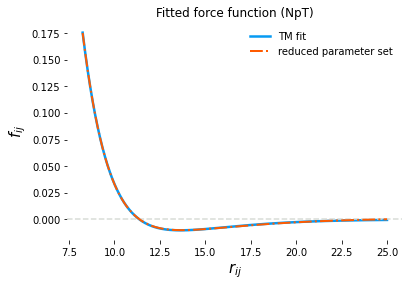

In [1]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

steps_between_points = 3
configurations = 1000

params = range(0, -15, -2)
outfile = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_npt_300.out"
hardener_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=60, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

hardener_tm.prepare_training_data()
hardener_tm.fit()

x = np.linspace(8.25, 25, 10000)
y_fit = hardener_tm.predict(x)
plot_1component(x, y_fit)
hardener_tm.best_subset(4, x, print_coeffs=True)

gamma = hardener_tm.fit_gamma(303)
print(f"gamma = {gamma}")

In [ ]:
import misc
import matplotlib.pyplot as plt
i = 0

plt.plot(hardener_tm.r[:, i, 0][0:1000])
r = misc.lowess(hardener_tm.r[:, i, 0], f=0.075)
plt.show()

v_ = misc.lowess(hardener_tm.v[:, i, 0][0:1000], f=0.02, iter=5)
plt.plot(hardener_tm.v[:, i, 0][0:1000])
plt.plot(v_[0:1000])
plt.show()

a_fit = misc.lowess(hardener_tm.a[:, i, 0][0:1000], f=0.02, iter=5) * 340.42  * hardener_tm.timestep ** 2

plt.plot(a_fit , label='tm')
plt.axhline(0, color='xkcd:silver', ls=':')
plt.legend()
plt.show()

### Epoxy - DGEBA

Loading data	9.35 s
Preparing input	5.8 s
Fitting	6.33 s
pair_coeff	1 1 -0.00390328549788616  0.6639171608822494  -237.94396220841736  10431.431728237774  -99940.86929072812  0   0   0   0   0   0   0   0   0   0   



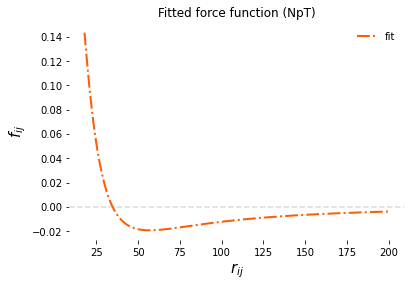

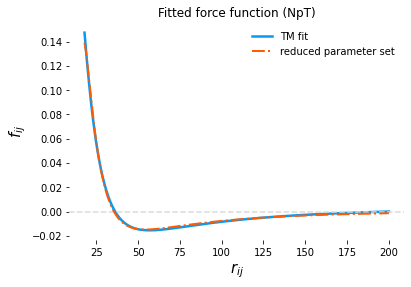

In [7]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

steps_between_points = 12 # 4(-1,-20,-1)60test-shifted; 12(-1,-20,-1)100test
configurations = 1500

params = range(-1, -20, -1)
outfile = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/epoxy/epoxy_npt_test.out"
epoxy_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.25, cutoff=100, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)


epoxy_tm.prepare_training_data()
epoxy_tm.fit()

x = np.linspace(18, 200, 10000)
y_fit = epoxy_tm.predict(x)
y_fit = y_fit

plot_1component(x, y_fit) #, thermostat='NpT', output_path='/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/epoxy_npt_test2.png')
epoxy_tm.best_subset(4, x, print_coeffs=True, center_y=True)

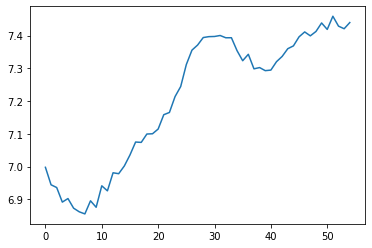

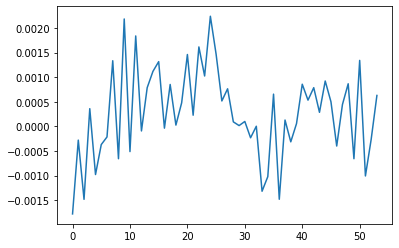

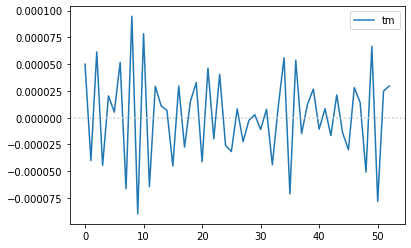

In [19]:
import misc
import matplotlib.pyplot as plt
i = 0 # try self.t = 4 and i = 2 for good gamma explanation

plt.plot(epoxy_tm.r[:, i, 0][0:1000])
r = misc.lowess(epoxy_tm.r[:, i, 0], f=0.075)
plt.show()

plt.plot(epoxy_tm.v[:, i, 0][0:1000])
plt.show()

a = epoxy_tm.a[:, i, 0][0:1000]
a_fit = misc.lowess(a, f=0.1, iter=5) * 340.42  * epoxy_tm.timestep ** 2

plt.plot(a , label='tm')
plt.axhline(0, color='xkcd:silver', ls=':')
plt.legend()
plt.show()